This notebook loads the consolidated ILI data excel sheet and examines it.

Also can filter and take specified rows and save them individually.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
import pandas as pd


file_name = r"I:\2023 ILI Pipe Tally Consolidation\All_ILIData.csv"

# Read the file
data = pd.read_csv(file_name, low_memory=False)

# Output the number of rows
print("Total rows: {0}".format(len(data)))

# See which headers are available
print(list(data))

Total rows: 2050139
['Vendor', 'Source', 'Route', 'Route_NoPrefix', 'MP1', 'MP2', 'Year', 'ILI Project Name', 'ML Survey Date', 'Alignment Comment', 'Joint / US GW Number', 'ILI Survey Distance (ft)', 'Joint Length (ft)', 'From U/S GW (ft)', 'To D/S GW (ft)', 'Identification', 'Comment', 'Tool Speed (mph)', 'WT (in)', 'SMYS (PSI)', 'MAOP (PSI)', 'OD (in)', 'Longseam Visible', 'Seam Pos.', 'Depth (%)', 'Depth* (with tool tolerances)', 'OD Reduction (%)', 'Length (in)', 'Width (in)', "O'clock", 'Internal', 'Bend Radius (D)', 'Bend Angle (degrees)', 'Bend Direction', 'POF Category', 'Associated Tool Tolerance', 'Anomaly ID', 'Estimated Failure Pressure (Pf) ', 'Pf/MAOP', 'Pf* (with tool tolerances)', 'Pf*/MAOP', 'TotalBend Strain', 'Bend - Vert Strain Component', 'Bend - Horiz Strain Component', 'Internal Dent Strain', 'External Dent Strain', 'Easting', 'Northing', 'Latitude', 'Longitude', 'Elevation', 'U/S Reference', 'Dist. To U/S Ref [ft]', 'D/S Reference', 'Dist. To D/S Ref [ft]', 'IL

Maybe save this as a binary file so it's easier to load?

In [4]:
# data.to_hdf('data.h5', key='ILI_data', mode='w')

# to load, do:
# pd.read_hdf('data.h5', 'ILI_data')  

In [5]:
data["PG&E Station Number"]

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
2050134    NaN
2050135    NaN
2050136    NaN
2050137    NaN
2050138    NaN
Name: PG&E Station Number, Length: 2050139, dtype: object

In [6]:
# Make the survey date into Date type
date_field = "ML Survey Date"
data[date_field]

0          10/25/2001
1          10/25/2001
2          10/25/2001
3          10/25/2001
4          10/25/2001
              ...    
2050134     3/17/2023
2050135     3/17/2023
2050136     3/17/2023
2050137     3/17/2023
2050138     3/17/2023
Name: ML Survey Date, Length: 2050139, dtype: object

In [7]:
data[date_field] = pd.to_datetime(data[date_field])

In [8]:
data[date_field]

0         2001-10-25
1         2001-10-25
2         2001-10-25
3         2001-10-25
4         2001-10-25
             ...    
2050134   2023-03-17
2050135   2023-03-17
2050136   2023-03-17
2050137   2023-03-17
2050138   2023-03-17
Name: ML Survey Date, Length: 2050139, dtype: datetime64[ns]

In [9]:
year_to_filter = 2022
filtered_df = data[data[date_field].dt.year == year_to_filter]

In [10]:
filtered_df["MP1"].isna().sum()

0

In [11]:
# 5.5% of the total rows come from 2022.
len(filtered_df) / len(data)

0.05461532120505

In [12]:
location_fields = [date_field, 'Longitude', 'Latitude', 'Elevation', 'U/S Reference', 'Dist. To U/S Ref [ft]', 'D/S Reference', 'Dist. To D/S Ref [ft]']

In [13]:
filtered_df[location_fields]

,ML Survey Date,Longitude,Latitude,Elevation,U/S Reference,Dist. To U/S Ref [ft],D/S Reference,Dist. To D/S Ref [ft]
1847283,2022-12-21,NaN,NaN,NaN,O001,0.000,AGM002,69.638
1847284,2022-12-21,NaN,NaN,NaN,O001,7.517,AGM002,62.121
1847285,2022-12-21,NaN,NaN,NaN,O001,7.525,AGM002,62.113
1847286,2022-12-21,NaN,NaN,NaN,O001,7.533,AGM002,62.105
1847287,2022-12-21,NaN,NaN,NaN,O001,10.154,AGM002,59.484
...,...,...,...,...,...,...,...,...
1959247,2022-11-21,-120.492586,36.539648,551.25,AGM,20.770,NaN,NaN
1959248,2022-11-21,-120.492593,36.539641,551.28,AGM,24.310,NaN,NaN
1959249,2022-11-21,-120.492595,36.539639,551.29,AGM,25.120,NaN,NaN
1959250,2022-11-21,-120.492597,36.539636,551.30,AGM,26.430,NaN,NaN


Not all the anomaly have longtitude and latitude, or stationing number. Can I ignore them?

In [14]:
filtered_df["Longitude"].isna().sum() / len(filtered_df)

0.0026971751109682142

Only 0.26% of the anomaly listings don't have coordinates...maybe it's ok? Is there some kind of distribution patterns for this?

In [15]:
no_coordinates_listings = filtered_df["Longitude"].isna()

In [16]:
filtered_df[no_coordinates_listings].head()

,Vendor,Source,Route,Route_NoPrefix,MP1,MP2,Year,ILI Project Name,ML Survey Date,Alignment Comment,...,Northing,Latitude,Longitude,Elevation,U/S Reference,Dist. To U/S Ref [ft],D/S Reference,Dist. To D/S Ref [ft],ILI Vendor Comments,PG&E Station Number
1847283,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,0.000,AGM002,69.638,Other Data Limit O001,NaN
1847284,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,7.517,AGM002,62.121,Other Weld W001,NaN
1847285,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,7.525,AGM002,62.113,Other Manufacturing Related O002,NaN
1847286,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,7.533,AGM002,62.105,Other Manufacturing Related O003,NaN
1847287,Intero,Pipe Tally,L-148,148,17.18,17.46,2022,L-148 - MP 17.18 to MP 17.46 - 2022,2022-12-21,NaN,...,NaN,NaN,NaN,NaN,O001,10.154,AGM002,59.484,Feature Metal Loss A001,NaN


In [17]:
np.unique(filtered_df[no_coordinates_listings]["Route"])

array(['L-148', 'L-173'], dtype=object)

In [18]:
no_coordinates_station_number = filtered_df[no_coordinates_listings]["PG&E Station Number"]

In [19]:
print(f"{no_coordinates_station_number.isna().sum() / len(no_coordinates_station_number) * 100}% of all anomalies without coordinates have no station numbers")

85.76158940397352% of all anomalies without coordinates have no station numbers


In [20]:
print(f"There are {len(np.unique(no_coordinates_station_number[no_coordinates_station_number.notna()]))} unique station numbers present for anomalies WITH coordinates")

There are 43 unique station numbers present for anomalies WITH coordinates


In [21]:
np.unique(filtered_df[no_coordinates_listings]["ILI Project Name"])

array(['L-148 - MP 17.18 to MP 17.46 - 2022',
       'L-173 - MP 1.59 to MP 1.69 - 2022'], dtype=object)

In [22]:
17.46-17.18, 1.69-1.59

(0.28000000000000114, 0.09999999999999987)

# Segment ILI data

In [23]:
from typing import Tuple

def make_ILI_data_for_year(
    all_ILI_df: pd.DataFrame,
    year: int
) -> Tuple[pd.DataFrame, str]:
    date_field = "ML Survey Date"
    all_ILI_df[date_field] = pd.to_datetime(all_ILI_df[date_field])
    filtered_df = all_ILI_df[all_ILI_df[date_field].dt.year == year]
    # save as file
    file_name = f"cleaned_ILI_{year}.csv"
    filtered_df.to_csv(file_name, index=False)
    return (filtered_df, file_name)

Change the following 2 cells to segment data for the desired year.

In [24]:
df_2021, csv_2021_name = make_ILI_data_for_year(data, 2021)

In [25]:
csv_2021_name

'cleaned_ILI_2021.csv'

# Look at failure pressure

In [28]:
# Change this to match whatever result
df = df_2021

In [29]:
FP_fields = ['Estimated Failure Pressure (Pf) ', 'Pf/MAOP', 'Pf* (with tool tolerances)', 'Pf*/MAOP']

In [30]:
available_pf = df["Estimated Failure Pressure (Pf) "][df["Estimated Failure Pressure (Pf) "].notna()]

(array([1.9120e+03, 2.0000e+00, 1.4600e+02, 2.7859e+04, 2.9446e+04,
        9.9880e+03, 1.2694e+04, 2.8260e+03, 7.2000e+01, 1.3100e+02]),
 array([   3.58 ,  315.711,  627.842,  939.973, 1252.104, 1564.235,
        1876.366, 2188.497, 2500.628, 2812.759, 3124.89 ]),
 <BarContainer object of 10 artists>)

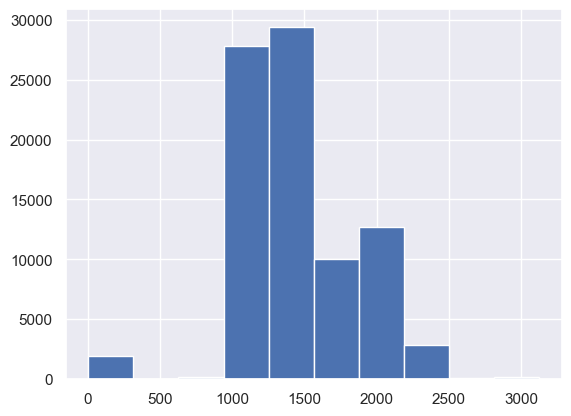

In [31]:
plt.hist(available_pf)

# Sanity check -- how many miles from this part?

In [65]:
df[df["ILI Project Name"] == "DREG4327 - MP 0.016 to MP 1.738 (North EOI to Location B) - 2021"]

,Vendor,Source,Route,Route_NoPrefix,MP1,MP2,Year,ILI Project Name,ML Survey Date,Alignment Comment,...,Northing,Latitude,Longitude,Elevation,U/S Reference,Dist. To U/S Ref [ft],D/S Reference,Dist. To D/S Ref [ft],ILI Vendor Comments,PG&E Station Number
1514674,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000,I001,0.508,NaN,NaN
1514675,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,W010,0.508,I002,2.244,NaN,NaN
1514676,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,I001,0.244,I002,2.000,NaN,NaN
1514677,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,I001,0.789,I002,1.455,NaN,NaN
1514678,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,I001,1.553,I002,0.691,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514823,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,I016,418.731,W640,8.224,NaN,NaN
1514824,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,I016,418.760,W640,8.195,NaN,NaN
1514825,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,I016,418.821,W640,8.134,NaN,NaN
1514826,Pipetel,Pipe Tally1,L-DREG4327,DREG4327,0.016,1.738,2021,DREG4327 - MP 0.016 to MP 1.738 (North EOI to ...,2021-11-02,NaN,...,NaN,NaN,NaN,NaN,I016,418.938,W640,8.017,NaN,NaN


In [51]:
unique_MP_pairs = df[["Route", "MP1", "MP2"]].drop_duplicates()

In [53]:
unique_MP_pairs["diff_MP"] = unique_MP_pairs["MP2"] - unique_MP_pairs["MP1"]

In [56]:
unique_MP_pairs

,Route,MP1,MP2,diff_MP
1514509,L-DREG4180,0.0220,0.0400,0.0180
1514517,L-DREG4180,0.0400,0.6200,0.5800
1514641,L-DREG4180,0.6400,0.7500,0.1100
1514674,L-DREG4327,0.0160,1.7380,1.7220
1515044,DFM-0837-01,0.0300,1.2300,1.2000
1516053,DFM-1601-09,0.2900,0.4300,0.1400
1516191,DFM-1611-03,3.3100,3.3300,0.0200
1516262,DFM-1615-01,0.0200,16.5800,16.5600
1519667,DFM-8805-03,0.0100,0.5200,0.5100
1519984,L-002,121.9100,122.1300,0.2200


In [57]:
unique_MP_pairs["diff_MP"].sum()

867.5454